In [10]:
import numpy as np
import statsmodels.api as sm
from scipy import stats
from matplotlib import pyplot as plt

plt.rc("figure", figsize=(10,5))
plt.rc("font", size=14)

C:\Users\SVEDU\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
df = context.io.load("preprocessed_pecius").query('Matavimas != "Nezinoma"')
df["matavimas_numeric"] = df["Matavimas"].apply(lambda x: 0 if x=="Pirmas" else 1)
df.head(2)

2021-07-31 10:41:07,254 - kedro.io.data_catalog - INFO - Loading data from `preprocessed_pecius` (CSVDataSet)...


,Data,Matavimas,Laikas,Lauko temperatura,lauko_temp_patikslinta,IN,OUT,Delta,Wind_mph,Humidity_percent,Barometer_mbar,delta_skirtumas,joules,watts,wind_kph,matavimas_numeric
0,20210118,Pirmas,14:45:00,-11.0,-13.0,51,64,13,5.0,72.0,1020.0,13,273000,75.833333,8.045,0
1,20210118,Antras,18:00:00,-11.0,-12.0,40,46,6,5.0,72.0,1020.0,6,126000,35.000000,8.045,1


## GLM

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                   27
Model:                            GLM   Df Residuals:                       25
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                          415.61
Method:                          IRLS   Log-Likelihood:                -118.67
Date:                Sat, 31 Jul 2021   Deviance:                       10390.
Time:                        10:42:31   Pearson chi2:                 1.04e+04
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -1.8621      0.754     -2.468      0.0

(array([1., 0., 0., 0., 0., 1., 1., 0., 3., 2., 1., 3., 0., 2., 2., 2., 3.,
        1., 0., 0., 0., 2., 0., 1., 2.]),
 array([-2.3251466 , -2.15695914, -1.98877168, -1.82058421, -1.65239675,
        -1.48420929, -1.31602182, -1.14783436, -0.9796469 , -0.81145943,
        -0.64327197, -0.47508451, -0.30689704, -0.13870958,  0.02947789,
         0.19766535,  0.36585281,  0.53404028,  0.70222774,  0.8704152 ,
         1.03860267,  1.20679013,  1.37497759,  1.54316506,  1.71135252,
         1.87953998]),
 <BarContainer object of 25 artists>)

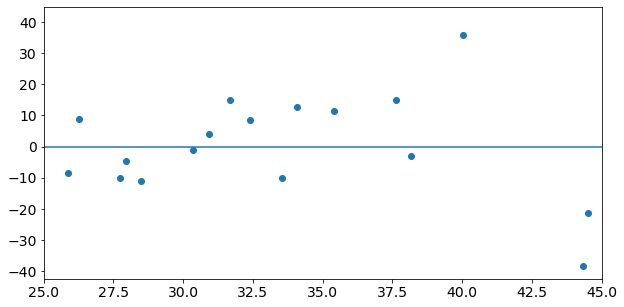

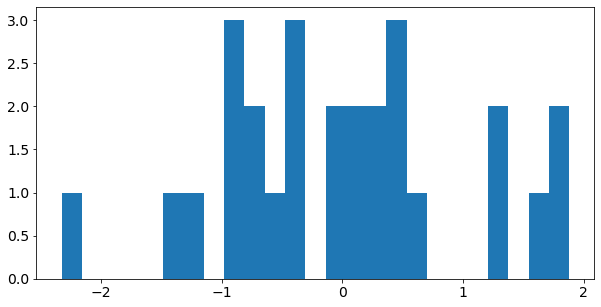

In [11]:
exog = np.array(df["watts"])
exog = np.expand_dims(exog, axis=-1)
endog = np.array(df[["lauko_temp_patikslinta", "wind_kph"]])

distribution = sm.families.Gaussian(sm.families.links.log())
glm_Normal = sm.GLM(exog, endog, fmaily=distribution)
glm_results=glm_Normal.fit()
print(glm_results.summary())

yhat = glm_results.mu
from statsmodels.graphics.api import abline_plot
fig, ax = plt.subplots()
ax.scatter(yhat, glm_results.resid_pearson)
ax.hlines(0, 25, 45)
ax.set_xlim(25, 45)

from scipy import stats
fig, ax = plt.subplots()
resid = glm_results.resid_deviance.copy()
resid_std = stats.zscore(resid)
ax.hist(resid_std, bins=25)


## LM

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

C:\Users\SVEDU\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\SVEDU\anaconda3\lib\site-packages\patsy\constraint.py:13: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.9 it will stop working
  from collections import Mapping


In [14]:

y = np.array(df["watts"])
X = np.array(df[["lauko_temp_patikslinta", "wind_kph"]])
#exog = np.expand_dims(exog, axis=-1)

LM_model = sm.OLS(y,X)
LM_results=LM_model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.730
Model:                            OLS   Adj. R-squared (uncentered):              0.709
Method:                 Least Squares   F-statistic:                              33.84
Date:                Sat, 31 Jul 2021   Prob (F-statistic):                    7.70e-08
Time:                        10:47:09   Log-Likelihood:                         -118.67
No. Observations:                  27   AIC:                                      241.3
Df Residuals:                      25   BIC:                                      243.9
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------